In [1]:
import os

import networkx as nx
import matplotlib.pyplot as plt

from simulations.sir_on_graph import *

In [2]:
def generate_node_colors(status):
    return [map_colors(v) for v in status.values()]


def map_colors(value):
    if value == SUSCEPTIBLE:
        return 'green'
    elif value == INFECTED:
        return 'red'
    elif value == RECOVERED:
        return 'yellow'
    else:
        raise ValueError('Incorrect value!')

In [3]:
def generate_animation_epidemic_on_graph(g, history):
    if not os.path.exists('tmp'):
        os.makedirs('tmp')
    
    pos = nx.layout.circular_layout(G)

    for idx, status in enumerate(history):
        H = nx.Graph()
        H.add_nodes_from(status)
        H.add_edges_from(G.edges)
        node_color = generate_node_colors(status)

        nx.draw_networkx(H, pos=pos, node_color=node_color)
        filepath = os.path.join('tmp', f'{idx}.png')
        
        plt.savefig(filepath)

### Lattice

In [4]:
G = nx.grid_2d_graph(3, 10)
history = sir_model_on_network(G, 0.5)

/home/pwielopolski/anaconda3/envs/datascience/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


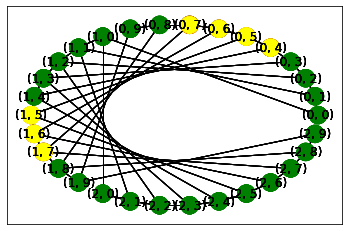

In [5]:
generate_animation_epidemic_on_graph(G, history)

In [6]:
!convert -delay 60 -loop 0 `ls -v tmp/*.png` outputs/lattice.gif 
!rm -rf tmp/

### Random Graph

In [7]:
G = nx.erdos_renyi_graph(30, 0.5)
history = sir_model_on_network(G, 0.5)

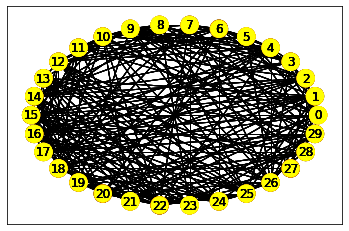

In [8]:
generate_animation_epidemic_on_graph(G, history)

In [9]:
!convert -delay 60 -loop 0 `ls -v tmp/*.png` outputs/random_graph.gif 
!rm -rf tmp/

### Watts-Strogatz

In [10]:
G = nx.watts_strogatz_graph(30, 10, 0.5)
history = sir_model_on_network(G, 0.5)

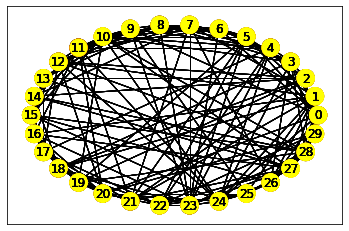

In [11]:
generate_animation_epidemic_on_graph(G, history)

In [12]:
!convert -delay 60 -loop 0 `ls -v tmp/*.png` outputs/watts_strogatz.gif 
!rm -rf tmp/

### Barabasi Albert

In [13]:
G = nx.barabasi_albert_graph(30, 4)
history = sir_model_on_network(G, 0.5)

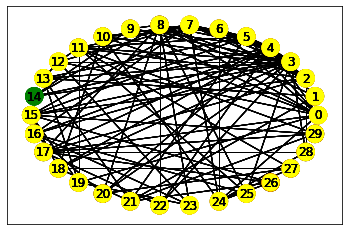

In [14]:
generate_animation_epidemic_on_graph(G, history)

In [15]:
!convert -delay 60 -loop 0 `ls -v tmp/*.png` outputs/barabasi_albert.gif 
!rm -rf tmp/